Ce notebook peut être édité/modifié/exécuté en ligne en cliquant sur le lien binder suivant
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fchatelain/calibration_MZI_triphases/HEAD?labpath=.%2Fanalytic_3_canaux.ipynb)


# Calibration des paramètres d'un MZI à 3 sorties

##  Modèle Physique

### Equation de la puissance en sortie du MZI en fonction du déphasage

On note $p_{\textrm{in}}$  la puissance du laser en entrée du MZI, et $\theta(t)$ le déphasage mesuré par le MZI. 

- 3 sorties déphasées de $2\pi/3$, dans ce ce cas les puissances sont de la forme:
\begin{align*}
p_1(\theta) &= a_1 \frac{p_{\textrm{in}}}{3} \left(1 + \textrm{cos}(\theta + \phi_1) \right),\\
p_2(\theta) &= a_2 \frac{p_{\textrm{in}}}{3} \left(1 + \textrm{cos}(\theta + 2\pi/3 + \phi_2)\right),\\
p_3(\theta) &= a_3 \frac{p_{\textrm{in}}}{3} \left(1 + \textrm{cos}(\theta - 2\pi/3 + \phi_3)\right),
\end{align*}
et $a_1$, $a_2$ et $a_3$, respectivement $\phi_1$, $\phi_2$ et $\phi_3$,  décrivent le deséquilibre de puissance, respectivement de phase, entre les différentes sorties à cause des imperfections des miroirs et lames semi-réfléchissantes (dans le cas idéal $a_1=a_2=a_3=1$ et $\phi_1=\phi_2=\phi_3=0$).

### Modèle d'observation

On dispose d'un détecteur optique pour chaque sortie. 
Dans le cas général, la mesure obtenue sur chaque détecteur est de la forme: 
$$
y_i = c_i (p_i(\theta) + \epsilon_i) + o_i,
$$
où $c_i$ est le gain du détecteur associé à la sortie $i$, $o_i$ est l'offset associé et  $\epsilon_i$ est le bruit d'observation.

### Hypothèses


- La puissance du laser en entrée est telle que $\frac{p_{\textrm{in}}}{3}=1$ (sans perte de généralité, car ce facteur serait pris en compte dans l'estimation des puissances de chaque sortie et ne modifie pas l'estimation du déséquilibre relatif ni sa correction). 
- On peut aussi supposer sans perte de généralité $c_1=c_2=c_3=1$, quitte à les prendre en compte dans les déséquilibres $a_1$,$a_2$ et $a_3$
- On suppose que les offsets, ou biais, $o_i$ sont connus, et on peut alors fixer $o_1=o_2=o_3=0$. En pratique, s'ils ne sont pas connus mais identiques $o_1=o_2=o_3=o$ ce qui semble réaliste, il faudrait observer un déphasage d'un tiers de tour au minimum pour estimer cet offset séparement de l'estimation des facteurs déséquilibres (en cherchant par exemple le minimum de puissance sur toutes les sorties).

Le modèle que l'on considère maintenant se ramène donc à

$$y_i(\theta) = p_i(\theta) + \epsilon_i,$$
où les puissances $p_i(\theta)$ pour chaque sortie $i=1,2,3$ sont données ci-dessus, et  le bruit  $\epsilon_i$ est supposé i.i.d de variance $\sigma^2$. 

### Quelques rappels sur les ellipses

Le vecteur 3d $(y_1(\theta), y_2(\theta), y_3(\theta))$,  comme défini ci dessus,  décrit une trajectoire paramétrée par $\theta$ qui est centrée autour d'une ellipse dans un plan 2d. Dans le cas où les signaux sont équilibrés $(a_1=a_2=a_3$ et $\phi_1=\phi_2=\phi_3=0)$ cette ellipse devient un cercle paramétré  comme $A(\cos(\theta), \sin(\theta)) + (o_u, o_v)$ dans son plan, ce qui permet de retrouver directement le déphasage $\theta$. Dans le cas général où les signaux sont mal équilibrés, estimer les paramètres de l'ellipse permet de remonter aux coefficients de déséquilibre $a_1,a_2,a_3$, $\phi_1,\phi_2,\phi_3$ et de les compenser pour obtenir une estimation consistante 
de $\theta$.

Plusieurs paramétrisation/représentation d'une ellipse peuvent alors être utiles

1. la forme *paramétrique* 3d en fonction de $\theta$:
\begin{align*}
p_1(\theta) &= a_1  \left(1 + \textrm{cos}(\theta + \phi_1) \right),\\
p_2(\theta) &= a_2 \left(1 + \textrm{cos}(\theta + 2\pi/3 + \phi_2)\right),\\
p_3(\theta) &= a_3  \left(1 + \textrm{cos}(\theta - 2\pi/3 + \phi_3)\right).
\end{align*}
Cette forme correspond au modèle d'observation. On peut vérifier que l'ellipse 
est définie dans la plan orthogonal au vecteur suivant
$$
\beta =  \left( \tfrac{\sin{\left(\phi_2 - \phi_3 - 2\pi/3\right)}} { a_1},
\tfrac{\sin{\left(\phi_3 - \phi_1 - 2\pi/3\right)}} { a_2},
\tfrac{\sin{\left(\phi_1 - \phi_2 - 2\pi/3\right)}} { a_3}\right)^T,
$$
et les paramètres géométriques de l'ellipse dans son plan (petit et grand axes, orientation, centre)  peuvent 
se déduire des coefficients de déséquilibre $a_1,a_2,a_3$ et  $\phi_1,\phi_2,\phi_3$, voir pex 
[V. Choqueuse *et al*, "Monitoring of Three-Phase Signals Based on Singular-Value Decomposition," in *IEEE TSG, 10(6), pp. 6156-6166, Nov. 2019](https://ieeexplore.ieee.org/document/8636981)

2. la forme géométrique, en coordonnées *polaires*, de l'ellipse. Dans la base orthonormale $(u,v)$ du plan 2d où elle est définie, l'ellipse peut se paramétrer comme 
$$
\begin{pmatrix}
x\\
y
\end{pmatrix} = 
\begin{pmatrix}
\cos \phi & - \sin \phi \\
 \sin \phi & \cos \phi
\end{pmatrix} 
\begin{pmatrix}
a & 0 \\
 0 & b
\end{pmatrix} 
\begin{pmatrix}
\cos \theta\\
\sin \theta
\end{pmatrix}
+
\begin{pmatrix}
o_u\\
o_v
\end{pmatrix},
$$
où $(x,y)$ sont les coordonnées dans le plan $(u,v)$, et $R_\phi$ est la matrice de rotation d'angle $\phi$.
Cette forme permet de retrouver directement les paramètres géométriques de l'ellipse : $a$ et $b$ sont les longueurs de ses grands et petits axes, $\phi$ son orientation, $(o_u,o_v)$ son centre. Cette forme permet également de retrouver directement la valeur 
de la phase $\theta$ en exprimant le signal bivarié (le signal "analytique") $(\cos \theta, \sin \theta)$ à partir des coordinées $(x,y)$ de la trajectoire 2d.

3. La forme *quadratique* définie par l'équation implicite dans le plan 2d :
$$Ax^2 +B xy +C y^2 +Dx+Ey +F =0,$$ où $(x,y)$ sont les coordonnées dans le plan  2d $(u,v)$ et 
$A$, $B$, $C$, $D$, $E$, $F$ sont les coefficients de la forme quadratique, avec la contrainte $B^2 < 4 AC$ (sinon c'est une hyperbole ou une parabole en cas d'égalité). Sous cette contrainte, il est possible de retrouver toutes les ellipses du plan.
Cette forme permet d'estimer facilement par moindres carrés l'ellipse en fonction des coordonnées $(x,y)$ de la trajectoire, car l'équation est linéaire 
par rapport aux coefficients $A$, $B$, $C$, $D$, $E$, $F$ à estimer (plus la contrainte $B^2 -4 AC<0$). On peut alors remonter aux paramètres géométriques et aux coefficients de déséquilibre $a_1,a_2,a_3$ et  $\phi_1,\phi_2,\phi_3$,  voir pex 
[W. Gander *et al.*, "Least-squares fitting of circles and ellipses", BIT Numerical Mathematics, 34, pages 558–578 (1994)](https://link.springer.com/article/10.1007/BF01934268)
et le lien wikipedia  https://en.wikipedia.org/wiki/Ellipse#General_ellipse

### Modules et fonctions utiles

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as lin
import matplotlib.pyplot as plt
import warnings

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={"float_kind": float_formatter})

# inline plots (change `inline` to `widget` to get interactive plots)
%matplotlib inline
#%matplotlib widget

%load_ext autoreload
%autoreload 2
# fonctions utiles depuis le fichier .py local
from ellutils import *

## Estimation des paramètres de déséquilibre

### 0. Synthèse des signaux

In [2]:
# Setting

n = 60  #  number of samples (Fe= 60Hz)
sigma = 1e-2 #  noise std

# linear phase theta in [a,b[
a = 0
b = 2 * np.pi / 4
theta = np.linspace(a, b, n, endpoint=False)

#  Parametres de déséquilibre
phi1, phi2, phi3 = 0, 0.1, +0.15  # Phases (rad)
vphi = np.array([phi1, phi2, phi3])
a1, a2, a3 = 1.2, 1, 1.5 # Amplitudes
vamp = np.array([a1, a2, a3])

tri = 2 / 3 * np.pi  # equi angle (rad) for 3 outputs

In [3]:
# Data generation: linear phase theta from a to b (rad)
X, Xwo, theta = gen_3_outputs(vamp, vphi, n, sig=sigma, theta_start=a, theta_end=b)

### 1. Estimation du plan de l'ellipse

On estime le vecteur normal au plan de l'ellipse par moindres carrés régularisés : $\min_{\beta} \sum_i \frac{1}{2n}(3 - \beta_1 p_{1i} - \beta_2 p_{1i} - \beta_3 p_{3i})^2 + \alpha|| \beta - (1,1,1)^{T} ||^2.$

Ceci permet d'obtenir une première solution afin de pondérer et équilibrer les signaux (en supposant les déphasages relatifs nuls, i.e. $\phi_0=\phi_1=\phi_2=0$ ou alors connus), qui peut être déjà suffisamment précise. Cette solution peut aussi servir comme a priori pour régulariser l'estimation de l'ellipse.

In [22]:
# X (regressor) is an n times 3 matrix of hstacked noisy p1, p2, p3
# y (target) is an n times 1 constant vector
y = np.ones((len(X[:, 0]), 1)) * 3

# En pratique ca ne s'avere pas nécessaire de régulariser dans les simus
#from sklearn.linear_model import RidgeCV, Ridge, LinearRegression
#alphas = np.logspace(-10, 3, num=20)
#betaref = np.ones((3,1))
#reg = RidgeCV(fit_intercept=False, alphas=alphas, cv=5).fit(X, y - X@betaref)
#beta = reg.coef_.reshape((3, 1)) + betaref #/ np.linalg.norm(reg.coef_)
#print(f"betareg={1/beta.ravel()}")
beta = lin.pinv(X.T @ X) @ (X.T @ y)
vamphat = 1 / beta.ravel()

#  Normalize the vector normal to the ellipse plane
beta /= np.linalg.norm(beta)
offset = np.mean(X @ beta)

# Compare with the true one
betatrue = get_normal_vect(vamp, vphi)

print(f"true normal vector = {betatrue.ravel()}")
print(f"est. normal vector = {beta.ravel()}")
print(f"true unbalance amp coef = {vamp}")
print(f"est. unbalance amp coef = {vamphat}")
print("affine plane offset = {:.4f}".format(offset))

true normal vector = [0.5450 0.7249 0.4214]
est. normal vector = [0.5505 0.7170 0.4275]
true unbalance amp coef = [1.2000 1.0000 1.5000]
est. unbalance amp coef = [1.2312 0.9453 1.5853]
affine plane offset = 2.0333


In [5]:
Bclarke_ref = np.sqrt(2 / 3) * np.array(
    [
        [1, -0.5, -0.5],
        [0, np.sqrt(3) / 2, -np.sqrt(3) / 2],
        [1 / np.sqrt(2), 1 / np.sqrt(2), 1 / np.sqrt(2)],
    ]
)
#  We can recover the above Clarke matrix from the matrix basis in the nominal
# case where the outputs are well balanced
_, _, _, _, _, Bclarke, _ = param2pol(np.array([1, 1, 1]), np.array([0, 0, 0]))


#  Theta estimate w/o any correction (default estimate)
z_clarke = Bclarke @ X.T
angle_clarke = np.unwrap(np.angle(z_clarke[0, :] - 1j * z_clarke[1, :]))

# This estimaye of theta assume that the relative phases are zero: phi1i=0
# The amplitude a1, a2, a3 can be estimated as the inverse of the beta entries
z_amp_corr = Bclarke @ np.diag(beta.ravel()) @ X.T
angle_amp_corr = np.unwrap(np.angle(z_amp_corr[0, :] - 1j * z_amp_corr[1, :]))

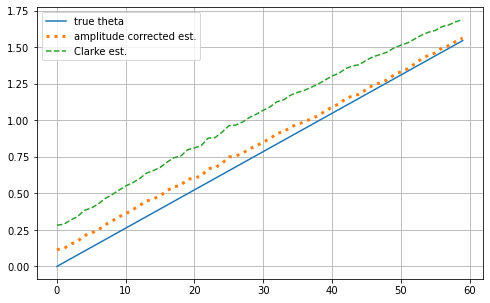

In [6]:
fs = (8, 5)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(theta, label="true theta")
ax.plot(angle_amp_corr, ":", linewidth=3, label="amplitude corrected est.")
ax.plot(angle_clarke, "--", label="Clarke est.")
ax.legend()
ax.grid("on")

<!--It is important to note that when the relative phases $\phi_1$, $\phi_2$, $\phi_3$ are *non-zero but known values*, we can directly obtain a good estimate for the unbalance amplitude parameters $a_1$, $a_2$, $a_3$ and the phase $\theta$ from the normal vector $\beta$ (vector orthogonal to the ellipse plane)-->
On peut noter que lorsque les déphasages relatifs $\phi_1$, $\phi_2$, $\phi_3$ sont non-nuls mais connus, on peut directement obtenir un bon estimateur des paramètres de déséquilibre des amplitudes et de la phase $\theta$ à partir de l'expression analytique du vecteur normal $\beta$ (vecteur orthogonal au plan de l'ellipse)

In [7]:
# We detrend the normal vector beta to get the only amplitude parameter ai estimates
vamp_corr = np.empty(vamp.shape)

# Intercept term to adjust
scaleamp = (
    - 1 / np.sin(phi2 - phi3 - tri)
    - 1 / np.sin(phi3 - phi1 - tri)
    - 1 / np.sin(phi1 - phi2 - tri)
) / 3
vamp_corr[0] = -scaleamp * vamphat[0] * np.sin(phi2 - phi3 - tri)
vamp_corr[1] = -scaleamp * vamphat[1] * np.sin(phi3 - phi1 - tri)
vamp_corr[2] = -scaleamp * vamphat[2] * np.sin(phi1 - phi2 - tri)


print(f"true unbalance amp coef = {vamp}")
print(f"est. unbalance amp coef = {vamphat}")
print(f"est. corrected amp coef = {vamp_corr}")

#  We can now derive the phase theta estimate based on the detrend ai estimates
angle_corr = pol2theta(*param2pol(vamp_corr, vphi), X)

true unbalance amp coef = [1.2000 1.0000 1.5000]
est. unbalance amp coef = [1.2312 0.9453 1.5853]
est. corrected amp coef = [1.2053 1.0257 1.4999]


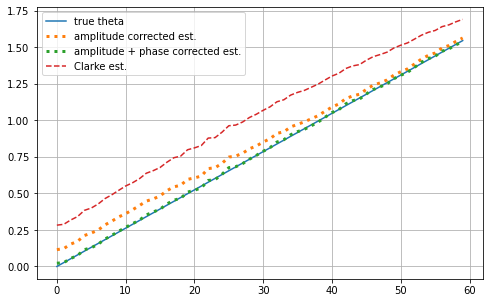

In [8]:
fs = (8, 5)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(theta, "-", label="true theta")
ax.plot(angle_amp_corr, ":", linewidth=3, label="amplitude corrected est.")
ax.plot(angle_corr, ":", linewidth=3, label="amplitude + phase corrected est.")
ax.plot(angle_clarke, "--", label="Clarke est.")
ax.legend()
ax.grid("on")

### 2. Projection dans le plan estime

In [9]:
# Projecteur orthogonal (sur le plan affine)
Portho = np.eye(3) - beta @ beta.T
Xproj = Portho @ X.T + offset * beta

In [10]:
#  Base orthogonale (u,v) du plan de l'ellipse
u = Portho[0, :] / np.linalg.norm(Portho[0, :])
v = Portho[1, :] - u * np.dot(u, Portho[1, :])
v /= np.linalg.norm(v)

In [11]:
# Matrice de passage vers la base orthonormale (u,v,beta)
Bell = np.vstack((u, v, beta.ravel()))
#  Coordonnées dans le plan affine de l'ellipse
Y = Bell @ X.T
y0 = Y[0, :].T
y1 = Y[1, :].T

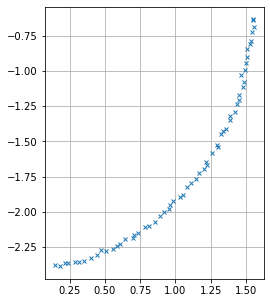

In [12]:
# Visu des echantillons dans le plan estimé
fs = (8, 5)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(y0, y1, "x", markersize=4)
ax.grid("on")
ax.set_aspect('equal')

### 3. Estimation des paramètres de l'ellipse

On estime les coefficients de la forme quadratique qui caractérise l'ellipse par moindre carrés régularisés : $\hat{\beta}(\alpha) = \arg \min_{\beta=(a,b,c,d,e)^T} \sum_i \frac{1}{2n}(1 - a 
y_{0i}^2 - b y_{0i}y_{1i} - c y_{1i}^2 - d y_{0i} - e y_{1i} )^2 + \alpha|| \beta - \beta_{\textrm{prior}} ||^2$. 

Différents choix possibles pour $\beta_{\textrm{prior}}$ 
- une solution obtenue à partir d'un calibrage préalable
- $\beta_{\textrm{prior}} = \frac{p_{\textrm{in}}}{3}(1,0,1,1,1)^{T}$: solution circulaire qui respecte les contraintes physiques entre amplitudes et offset
- une solution obtenue à partir du vecteur orthogonal au plan de l'ellipse (qui respecte les contraintes physiques entre amplitudes et offset), voir ci dessous

La régularisation permet de converger vers une solution admissible (elliptique et suffisamment proche des données) en favorisant la solution pour laquelle la contrainte physique (biais et amplitudes $a_i$ égaux) est la mieux satisfaite. Une solution, peut être plus précise dans les cas difficiles mais aussi plus complexe, serait de prendre en compte cette contrainte non convexe lors de la minimisation (la minimisation à partir de la forme polaire serait dans ce cas plus appropriée).

In [13]:
# Prior solution: estimate of the amplitude vamphat which assumes that the 
# relative phases are zero (phi1=phi2=phi3=0)
vphizero= np.zeros(3)
beta_prior = pol2quad(*param2pol(vamphat.ravel(), vphizero)[:5])

shrinkage optimal parameter = 0.000359381


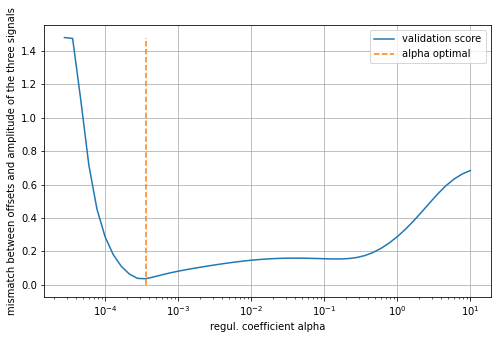

In [14]:
Xell = np.vstack((y0 ** 2, y0 * y1, y1 ** 2, y0, y1)).T
ytarget = np.ones((len(y0), 1))

# Scale (reduce) the data
Xestd = np.std(Xell, axis=0)  # Xestd[:] = 1
Xells = Xell / Xestd
U, s, Vh = lin.svd(Xells.T, full_matrices=False)
s /= np.sqrt(n)
#  Set a circular prior with physically possible offset
beta0 = np.ones((5, 1))
beta0[1] = 0
# Set as prior the previous solution obtained by assuming phi1=phi2=phi3
# (which satisfu the physical constraint for the offset)
beta0 = np.array(beta_prior[:5]).reshape(5, 1)
ytarget0 = (ytarget - Xells @ beta0) / np.sqrt(n)
# precompute the 5*n products
Vy = Vh @ ytarget0


def fit_quadcoeff(alpha):
    # Shrink the solution towards the prior to regularize the fit
    coef_ell = (U * (s / (s ** 2 + alpha))) @ Vy + beta0
    # Set the original scale
    coef_ell = coef_ell.ravel() / Xestd  # coef A,B,C,D,E
    valscore = validation_score(*coef_ell.T, -1, offset, Bell)
    return coef_ell, valscore


# Shrinkage parameters
alphas = np.logspace(-10, 1, num=100)
valscore = np.zeros(alphas.shape)
for ia, alpha in enumerate(alphas):
    coeff, valscore[ia] = fit_quadcoeff(alpha)
    # print(f"alpha={alpha}: valscore={valscore[ia]}")

if np.min(valscore) > 0.1:
    warnings.warn(
        f"estimation results for the ellipsis are not consistent with the physical constraints.\nMismatch = {np.min(valscore)}",
        RuntimeWarning,
    )

alphaopt = alphas[np.argmin(valscore)]
coef_ell, _ = fit_quadcoeff(alphaopt)
A, B, C, D, E = coef_ell.T
F = -1
print("shrinkage optimal parameter = {:g}".format(alphaopt))


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(alphas, valscore, label="validation score")
ax.plot(
    [alphaopt, alphaopt],
    [0, np.max(valscore[np.isfinite(valscore)])],
    "--", label="alpha optimal",
)
ax.set_xscale("log")
ax.set_ylabel("mismatch between offsets and amplitude of the three signals")
ax.set_xlabel("regul. coefficient alpha")
ax.legend()
ax.grid("on")

Ellipsis parameter from quadratic form parameters, see https://en.wikipedia.org/wiki/Ellipse#General_ellipse

In [15]:
a, b, phi, offu, offv = quad2pol(A, B, C, D, E, F)
print(a, b, phi, offu, offv)

1.6754464601632537 1.377168947068531 1.26024259256758 0.14007545389673692 -0.7435342246785385


### 4. Visualisation le l'ellipse estimée

#### Trajectoires dans le plan affine estimé

In [16]:
t = np.linspace(0, 2 * np.pi, 512)
#  Fit ellipsis on the estimated plane
xthat = a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi) + offu
ythat = a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi) + offv
#  Actual ellipsis (projection on the estimated plane)
x1 = a1 * (1 + np.cos(t + phi1))
x2 = a2 * (1 + np.cos(t + tri + phi2))
x3 = a3 * (1 + np.cos(t - tri + phi3))
Xp = Bell @ np.vstack((x1, x2, x3))

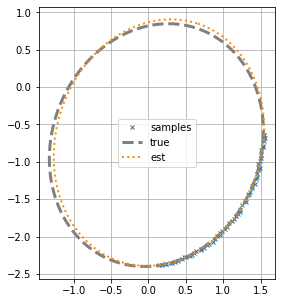

In [17]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(y0, y1, "x", markersize=4, label="samples")
ax.plot(Xp[0, :], Xp[1, :], "--", color="gray", linewidth=3, label="true")
ax.plot(xthat, ythat, ":", color="darkorange", linewidth=2, label="est")
ax.legend()
ax.grid("on")
ax.set_aspect('equal')
# Lines below are useful to plot the fit when this not elliptic
# delta = 0.005
# xrange = np.arange(-1.0, 1.0, delta)
# yrange = np.arange(-1.0, 1.0, delta)
# XX, YY = np.meshgrid(xrange, yrange)
# ax.contour(XX, YY, A * XX ** 2 + B * XX * YY + C * YY ** 2 + D * XX + E * YY + F, [0])

#### Trajectoire dans l'espace 3D des signaux observés

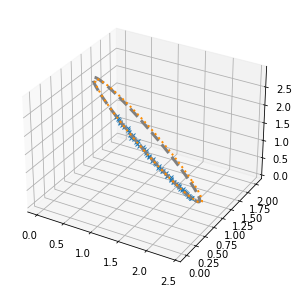

In [18]:
from mpl_toolkits import mplot3d

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax = plt.axes(projection="3d")
# Data for a three-dimensional line
ax.plot3D(X[:, 0], X[:, 1], X[:, 2], "x", markersize=4)
ax.plot3D(x1, x2, x3, "--", color="gray", linewidth=3)
x3dhat = (
    u.reshape((-1, 1)) @ xthat.reshape((1, -1))
    + v.reshape((-1, 1)) @ ythat.reshape((1, -1))
    + offset * beta
)
ax.plot3D(
    x3dhat[0, :], x3dhat[1, :], x3dhat[2, :], ":", color="darkorange", linewidth=2
)
plt.show()

### 5. Calcul des paramètres de déséquilibre
Les paramètres de l'ellipse nous donnent directement les déséquilibres de puissance et de phase

In [19]:
modpower, phases, phase0 = pol2balance(a, b, phi, Bell, phaseref=phi1)
print(f"actual relative power = {[a1, a2, a3]}")
print(f"est of relative power = {modpower}")
diffphases = subsangle(np.array([0, tri, -tri]), phases)
print(f"actual relative phases = {[phi1, phi2, phi3]}")
print(f"est of relative phases = {diffphases.ravel()}")

actual relative power = [1.2, 1, 1.5]
est of relative power = [1.1752 1.0143 1.5146]
actual relative phases = [0, 0.1, 0.15]
est of relative phases = [0.0000 0.0723 0.1459]


### 6. Estimateurs du déphasage $\theta$ avec ou sans correction

In [20]:
thetahat = pol2theta(a, b, phi, offu, offv, Bell, phase0, X)
rms = np.sqrt(np.mean(subsangle(thetahat.ravel(), theta.ravel()) ** 2))
print("RMS for the balanced estimator = {:.4f}".format(rms))

#  Clarke transform to estimate the phase (w/o the balance correction)
xalpha = X[:, 0] - 0.5 * X[:, 1] - 0.5 * X[:, 2]
xbeta = np.sqrt(3) / 2 * (X[:, 1] - X[:, 2])
thetaunbal = np.angle(xalpha.ravel() + 1j * xbeta.ravel())
thetaunbal = np.unwrap(thetaunbal)
rmsunbal = np.sqrt(np.mean(subsangle(-thetaunbal, theta) ** 2))
print("RMS for the direct (unbalanced) estimator = {:.4f}".format(rmsunbal))

RMS for the balanced estimator = 0.0258
RMS for the direct (unbalanced) estimator = 0.2590


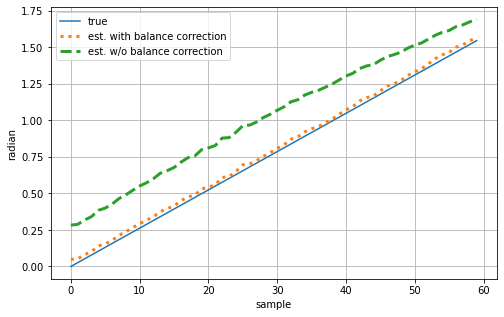

In [21]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=fs)
ax.plot(theta, label="true")
ax.plot(thetahat, ":", linewidth=3, label="est. with balance correction")
ax.plot(-thetaunbal, "--", linewidth=3, label="est. w/o balance correction")
ax.set_ylabel("radian")
ax.set_xlabel("sample")
ax.legend()
ax.grid("on")

## Bilan

 
- méthode simple de moindre carrés, avec régularisation pour prendre en compte les contraintes physiques entre le centre de l'ellipse. Complexité faible de l'algo en $K\times n$ opérations avec $K\approx 10$.
- si on suppose que les déséquilibres de phase $\phi_1, \phi_2, \phi_3$ sont connus (pex pas de dérive depuis une calibration initiale), une méthode encore plus simple qui repose juste sur l'estimation du vecteur normal au plan de l'ellipse marche très bien aussi.
- Seule hypothèse restrictive par rapport au modèle d'observation général : connaitre l'offset $o$ du décteur optique, ce qui semble réaliste d'après les simus qur données réelles de notre IMZ (pas de dérive) ou nécessiterait sinon d'observer au moins 1/3 de tour pour ré-estimer séparement ce paramètre (en regardant les minima de chaque signaux)
- Possible d'estimer l'ellipse et corriger la phase même en observant un arc de petite taille : 1/4 d'ellipse dans la simu ci dessus pour un niveau de bruit comparable aux données réelles. Si on diminue le bruit on peut regarder des arcs encore plus petits avec encore une très bonne reconstruction.
- La limite de l'algo est lorsqu'on n'arrive plus à estimer correctement le plan de l'ellipse (arc trop court et trop de bruit). Mais même dans ce cas on fait en général mieux, ou pas pire, si le système est déséquilibré que la méthode classique de la transformée de Clarke qui suppose que les signaux sont équilibrés.
- On peut sûrement gagner encore un peu dans les cas difficiles en prenant en compte de manière stricte la contrainte physique non-convexe entre le centre de l'ellipse et les longueurs des axes (relaxée dans l'algo actuel). L'optimisation sera sensiblement plus complexe, ce qui limite dans la perpective d'un traitement embarqué, et ce n'est pas sûr qu'on gagne énormément si on n'arrive même pas à estimer correctement le plan de l'ellipse.